<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Life Expectancy Data)

The dataset contains the health data of 2938 individuals useful for predicting the life expentency of the individuals. The features are related to economical factors, immunity realted factors, social factors and so on.

Attribute Information:

**Country:** Country of the recorded data

**Year:** Year of the recorded data

**Status:** Status of the country

**Life expectancy:** Life expectancy in age (target/dependent variable)

**Adult mortality:** Rate of adult mortality

**Infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol consumption (in litres of pure alcohol)

**Percentage expenditure:** Expenditure on health as a percentage of GDP

**Hepatitis B:** Hepatitis B immunization coverage among 1-year-olds (%)

**Measles:** Number of reported cases per 1000 population

**BMI:** Average BMI of entire population

**Under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio immunization coverage among 1-year-olds (%)

**Total expenditure:** Government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** DTP3 immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Thinness 1-19 years:** Prevalence of thinness for age 1 to 19 (%)

**Thinness 5-9 years:** Prevalence of thinness for age 5 to 9 (%)

**Income composition of resources:** Human Development Index in terms of income composition of resources

**Schooling:** Number of years of Schooling

**Import the required libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer, LabelEncoder,OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import variation


#### Load the life expectancy dataset and print the first five observations

In [3]:
df1=pd.read_csv('Life Expectancy Data.csv')
df1.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [81]:
df1.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,27.700000,28.600000,0.948000,20.700000


In [97]:
df1.shape[0]

2938

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the data type of each variable and if any variable is wrongly identified, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
df1.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                        int64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness  1-19 years               float64
Thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [84]:
df1['Population'] = df1['Population'].replace(['#', 'N/A'], np.nan)

# or we can also use 
# df1['Population'] = pd.to_numeric(df1['Population'], errors='coerce').astype('float64')

In [85]:
df1['Population'] = df1['Population'].fillna(0)


In [86]:
df1['Population'] = df1['Population'].astype('float')

In [90]:
df1.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                        int64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness  1-19 years               float64
Thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [92]:
df1['Population'].isnull().value_counts()

False    2938
Name: Population, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Create a DataFrame containing the count and percentage of missing entries in each variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

In [22]:
missing_counts = df1.isnull().sum()
missing_percentages = (missing_counts / df1.shape[0]) * 100
missing_data = pd.concat([missing_counts, missing_percentages.round(2)], axis=1)
missing_data.columns = ['Missing Count', 'Missing Percentage']
print(missing_data)

                                 Missing Count  Missing Percentage
Country                                      0                0.00
Year                                         0                0.00
Status                                      16                0.54
Life expectancy                             10                0.34
Adult mortality                             10                0.34
Infant deaths                                0                0.00
Alcohol                                    194                6.60
Percentage expenditure                       0                0.00
Hepatitis B                                553               18.82
Measles                                      0                0.00
BMI                                         34                1.16
Under-five deaths                            0                0.00
Polio                                       19                0.65
Total expenditure                          226                

In [23]:
df1.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3a. Are there any extreme values present in the government's total expenditure on health?
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

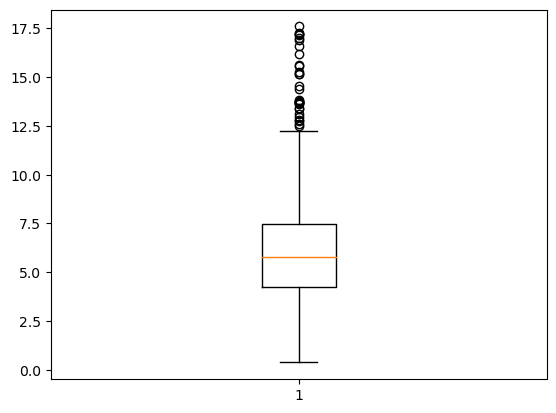

In [6]:
plt.boxplot(df1['Total expenditure'].dropna())
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3b. Remove the outliers present in 'Total expenditure' using the quartiles of the variable	
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
Total_expenditure_mean=df1['Total expenditure'].mean()
q1 = df1['Total expenditure'].quantile(0.25)
q3 = df1['Total expenditure'].quantile(0.75)
iqr=q3-q1
ll=q1-iqr*1.5
ul=q3+iqr*1.5
df1['Total_expenditure_otm']= df1['Total expenditure'].apply(lambda x: Total_expenditure_mean if (x>ul)| (x<ll) else x)


<AxesSubplot:>

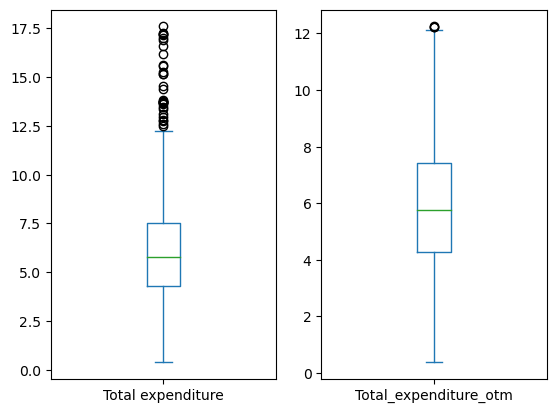

In [9]:
plt.subplot(1,2,1)
df1['Total expenditure'].plot(kind='box')
plt.subplot(1,2,2)
df1['Total_expenditure_otm'].plot(kind='box')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Split the data such that 'X' will contain all the indepentdent variables and 'y' will contain the target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
df1.head(2)

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Total_expenditure_otm
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,8.16
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,8.18


**Hint:** 'Life expectancy' is the target variable depending on the remaining variables.

In [28]:
x = df1.drop('Life expectancy', axis=1)
y = df1['Life expectancy']

In [29]:
x.head(5)

,Country,Year,Status,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Total_expenditure_otm
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,8.16
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,8.18
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,8.13
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,8.52
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,7.87


In [30]:
y.head(5)

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Split the independent variables into two sets with the proportion of 70:30</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [61]:
x_train

,Country,Year,Status,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Total_expenditure_otm
261,Belize,2010,Developing,186.0,0,6.76,569.952712,96.0,0,47.0,...,5.85,96.0,0.2,4344.151770,32168.0,3.5,3.4,0.700,12.4,5.85
837,Equatorial Guinea,2012,Developing,337.0,3,11.89,1500.412635,NaN,1190,23.0,...,4.00,24.0,8.2,21557.652800,138593.0,8.7,8.7,0.583,9.2,4.00
2080,Qatar,2006,Developing,83.0,0,1.28,448.595299,96.0,144,65.0,...,2.58,96.0,0.1,6256.559260,0.0,4.9,4.5,0.835,13.7,2.58
358,Brazil,2009,Developing,157.0,57,7.33,564.523390,99.0,0,51.1,...,8.65,99.0,0.1,8553.384700,194895996.0,3.0,2.9,0.714,13.8,8.65
78,Antigua and Barbuda,2001,Developing,154.0,0,7.51,163.767698,96.0,0,38.9,...,4.48,97.0,0.1,9358.154162,0.0,3.6,3.5,0.000,0.0,4.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Colombia,2003,Developing,15.0,16,4.25,417.803890,92.0,0,49.0,...,5.92,92.0,0.1,2246.257472,42152151.0,2.5,2.2,0.659,11.6,5.92
638,Costa Rica,2002,Developing,99.0,1,4.17,112.949375,94.0,0,47.3,...,8.23,94.0,0.1,462.149650,46324.0,2.2,2.2,0.712,11.9,8.23
542,Chad,2001,Developing,4.0,42,0.30,26.874391,NaN,24908,14.1,...,6.90,26.0,4.8,197.315644,866312.0,11.3,11.2,0.300,4.9,6.90
1924,Norway,2001,Developed,82.0,0,5.49,6356.827282,NaN,4,54.0,...,8.65,91.0,0.1,38549.589340,4513751.0,0.8,0.7,0.917,17.5,8.65


In [62]:
x_test

,Country,Year,Status,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Total_expenditure_otm
1856,New Zealand,2004,Developed,79.0,0,9.15,442.377487,88.0,33,61.5,...,7.89,89.0,0.1,2542.399350,0.0,0.3,0.3,0.884,18.4,7.89
532,Chad,2011,Developing,365.0,46,0.56,67.762691,33.0,8650,17.5,...,3.17,33.0,3.9,989.236363,12288651.0,9.2,9.1,0.370,6.7,3.17
2730,Ukraine,2015,Developing,195.0,4,NaN,0.000000,22.0,105,61.3,...,NaN,23.0,0.2,2124.662666,4515429.0,2.3,2.4,0.748,15.3,NaN
754,Djibouti,2014,Developing,252.0,1,0.38,24.732997,78.0,0,34.4,...,1.57,78.0,2.1,174.915110,912164.0,5.6,5.4,0.467,6.3,1.57
1115,Guyana,2006,Developing,24.0,1,7.04,170.632584,93.0,0,39.6,...,4.67,93.0,1.1,1945.639500,74961.0,5.7,5.5,0.622,11.7,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,Mongolia,2007,Developing,26.0,2,3.79,126.698109,98.0,12,43.9,...,5.60,95.0,0.1,1634.814310,259167.0,2.2,2.4,0.661,13.0,5.60
2679,Tunisia,2001,Developing,11.0,4,1.19,257.287870,94.0,231,48.9,...,5.29,98.0,0.1,2254.933126,978571.0,6.5,6.4,0.654,13.1,5.29
949,Gabon,2012,Developing,276.0,2,8.30,805.392528,82.0,2,34.6,...,3.13,82.0,4.9,9774.181170,1756817.0,6.3,6.2,0.669,12.5,3.13
2665,Tunisia,2015,Developing,1.0,3,NaN,0.000000,98.0,16,61.2,...,NaN,98.0,0.1,3828.915890,11273661.0,6.5,6.4,0.723,14.6,NaN


In [63]:
y_train

261     69.5
837     56.7
2080    76.6
358     73.6
78      73.8
        ... 
588     72.4
638     78.3
542     48.0
1924    78.8
1074    59.0
Name: Life expectancy, Length: 2056, dtype: float64

In [64]:
y_test

1856    79.2
532     51.6
2730    71.3
754     63.0
1115    65.2
        ... 
1724    65.9
2679    73.2
949     63.5
2665    75.3
1948    64.8
Name: Life expectancy, Length: 882, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. How would you treat the missing values in the variable 'GDP'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
mean_GDP = df1['GDP'].mean()
df1['GDP'].fillna(mean_GDP, inplace=True)

In [47]:
df1['GDP']

0       584.259210
1       612.696514
2       631.744976
3       669.959000
4        63.537231
           ...    
2933    454.366654
2934    453.351155
2935     57.348340
2936    548.587312
2937    547.358878
Name: GDP, Length: 2938, dtype: float64

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2922 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.There are 16 observations for which the status of the corresponding country is unknown, impute this status with an appropriate values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df1[df1['Status'].isna()].index

Int64Index([6, 15, 27, 46, 65, 75, 82, 93, 104, 118, 136, 148, 458, 1129, 2003,
            2068],
           dtype='int64')

In [11]:
df1[df1['Status'].isna()].copy()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Total_expenditure_otm
6,Afghanistan,2009,NaN,58.6,281.0,77,0.01,56.762217,63.0,2861,...,9.42,63.0,0.1,445.893298,284331,18.6,18.7,0.434,8.9,9.42
15,Afghanistan,2000,NaN,54.8,321.0,88,0.01,10.424960,62.0,6532,...,8.20,24.0,0.1,114.560000,293756,2.3,2.5,0.338,5.5,8.20
27,Albania,2004,NaN,73.0,17.0,1,4.54,221.842800,99.0,7,...,6.38,97.0,0.1,2416.588235,326939,1.8,1.9,0.681,10.9,6.38
46,Algeria,2001,NaN,71.4,145.0,20,0.23,147.986071,NaN,2686,...,3.84,89.0,0.1,1732.857979,31592153,6.4,6.3,0.644,10.9,3.84
65,Antigua and Barbuda,2014,NaN,76.2,131.0,0,8.56,2422.999774,99.0,0,...,5.54,99.0,0.2,12888.296670,#,3.3,3.3,0.782,13.9,5.54
75,Antigua and Barbuda,2004,NaN,74.4,149.0,0,7.28,22.862952,97.0,0,...,4.21,97.0,0.1,1352.837400,#,3.5,3.4,0.000,0.0,4.21
82,Argentina,2013,NaN,76.0,119.0,8,8.28,1001.796332,94.0,0,...,4.99,94.0,0.1,12976.636420,42539925,1.0,0.9,0.823,17.3,4.99
93,Argentina,2002,NaN,74.1,138.0,12,7.81,470.186915,66.0,0,...,8.31,93.0,0.1,2579.193168,3788937,1.2,1.0,0.776,16.3,8.31
104,Armenia,2007,NaN,73.5,132.0,1,3.99,44.572200,85.0,1,...,4.31,88.0,0.1,3138.887300,293356,2.0,2.1,0.707,11.7,4.31
118,Australia,2009,NaN,81.7,66.0,1,10.62,7172.275229,94.0,104,...,9.50,92.0,0.1,42742.998980,216917,0.7,0.6,0.925,19.1,9.50


In [51]:
status_mode = df1['Status'].mode().iloc[0]
df1['Status'].fillna(status_mode, inplace=True)


In [52]:
df1.loc[df1['Status'].isna()].index

Int64Index([], dtype='int64')

In [53]:
print('Number of missing values in Status column:', df1['Status'].isnull().sum())

Number of missing values in Status column: 0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Define a function to find the extreme values in alcohol consumption
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

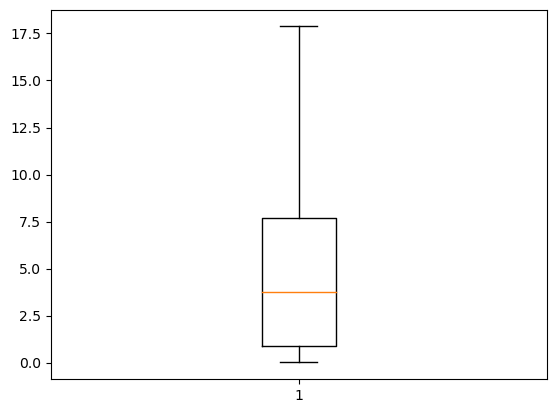

In [54]:
plt.boxplot(df1['Alcohol'].dropna())
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a column 'Life_expectancy_level' such that it will contain three levels (High, Medium, Low) based on the life expectancy </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
df1['Life expectancy']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64

In [56]:
conditions = [
    df1['Life expectancy'] >= 70,
    df1['Life expectancy'] >= 59,
    df1['Life expectancy'] < 59
]
choices = ['High', 'Medium', 'Low']
df1['Life_expectancy_level'] = np.select(conditions, choices)

In [57]:
print(df1['Life_expectancy_level'].head(10))

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
5       Low
6       Low
7       Low
8       Low
9       Low
Name: Life_expectancy_level, dtype: object


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Check how life expectancy has changed over the years in China</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
china_df1= df1[df1['Country'] == 'China']

Text(0, 0.5, 'Life Expectancy')

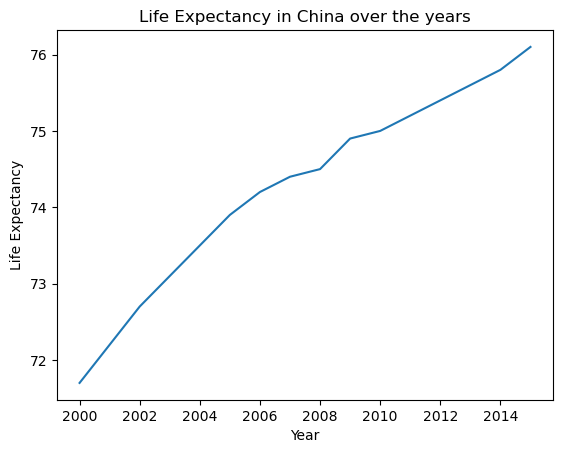

In [59]:
plt.plot(china_df1['Year'], china_df1['Life expectancy'])
plt.title('Life Expectancy in China over the years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')